In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
from torch import nn, optim

from data_loading import *
from pytorch_utils import *
from evaluation import *
from models import *

## Load datasets

In [2]:
datafile = "stress_vor_w.mat" #  Within sample set - Voronoi Set
ossfile = "stress_vor_o.mat"  # Outside sample set - Voronoi Set
datascale = 10000

dataset = load_matlab_dataset(datafile, datascale)
idxs_tr, idxs_val = get_split_indices(dataset)

oss = load_matlab_dataset(ossfile, datascale)

## Training

### Create a model

In [3]:
model = SSENet()

### Train the model

In [4]:
epochs = 50
model, tr_loss, val_loss, train_time = train_model(model, dataset, idxs_tr, idxs_val, epochs=epochs)

Epoch 0 of 50... Train loss: 0.012911393327653753      Test loss: 0.012730814697489504
Epoch 1 of 50... Train loss: 0.00873047956721368      Test loss: 0.009462326396914314
Epoch 2 of 50... Train loss: 0.007803040214514407      Test loss: 0.008216855004353511
Epoch 3 of 50... Train loss: 0.007141685773152091      Test loss: 0.007180855993927584
Epoch 4 of 50... Train loss: 0.0064337347061095415      Test loss: 0.006852053180126604
Epoch 5 of 50... Train loss: 0.005916458312207018      Test loss: 0.0068445350741809016
Epoch 6 of 50... Train loss: 0.005580670246865815      Test loss: 0.006206471647291065
Epoch 7 of 50... Train loss: 0.005634302719380003      Test loss: 0.0067521326376039385
Epoch 8 of 50... Train loss: 0.00507244321046429      Test loss: 0.005735556474164755
Epoch 9 of 50... Train loss: 0.004873874443089513      Test loss: 0.005652349647239987
Epoch 10 of 50... Train loss: 0.00466065902337178      Test loss: 0.005618948274706136
Epoch 11 of 50... Train loss: 0.0045454051

### Save model

In [6]:
torch.save(model, "voronoi_model.pth")

### Plot loss curves during training

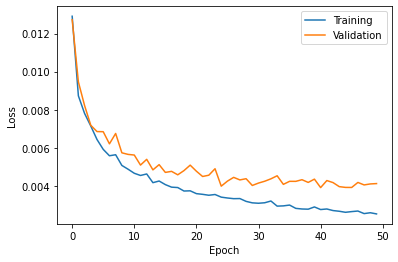

In [7]:
plt.figure()
plt.plot(tr_loss)
plt.plot(val_loss)
plt.legend(['Training', 'Validation'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Evaluate model

- Training shapes
- Testing shapes
- Out of sample set shapes

In [8]:
vals1, vals2, vals3 = evaluate_all_data(model, dataset, idxs_tr, idxs_val, oss)

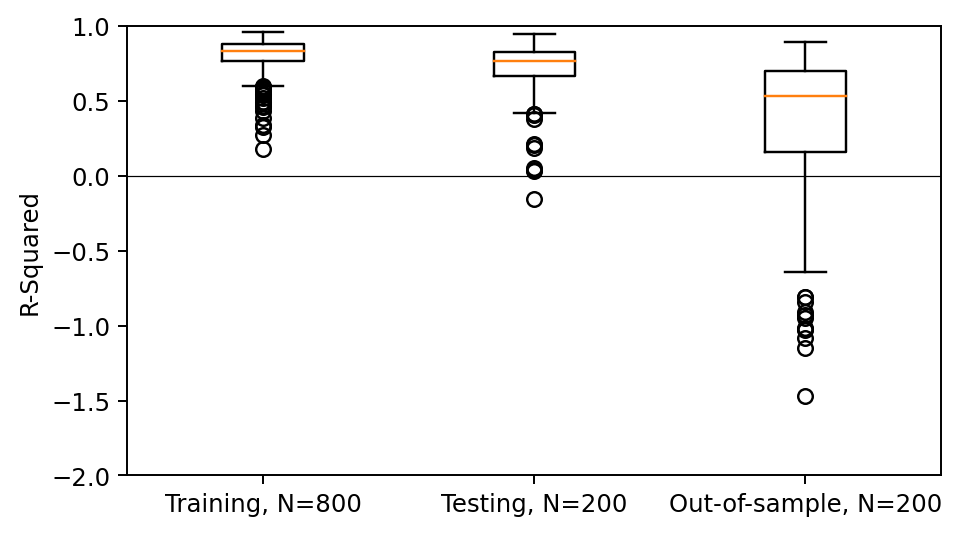

In [10]:
plot_boxes(vals1, vals2, vals3, [-2,1])

## Visualize a prediction

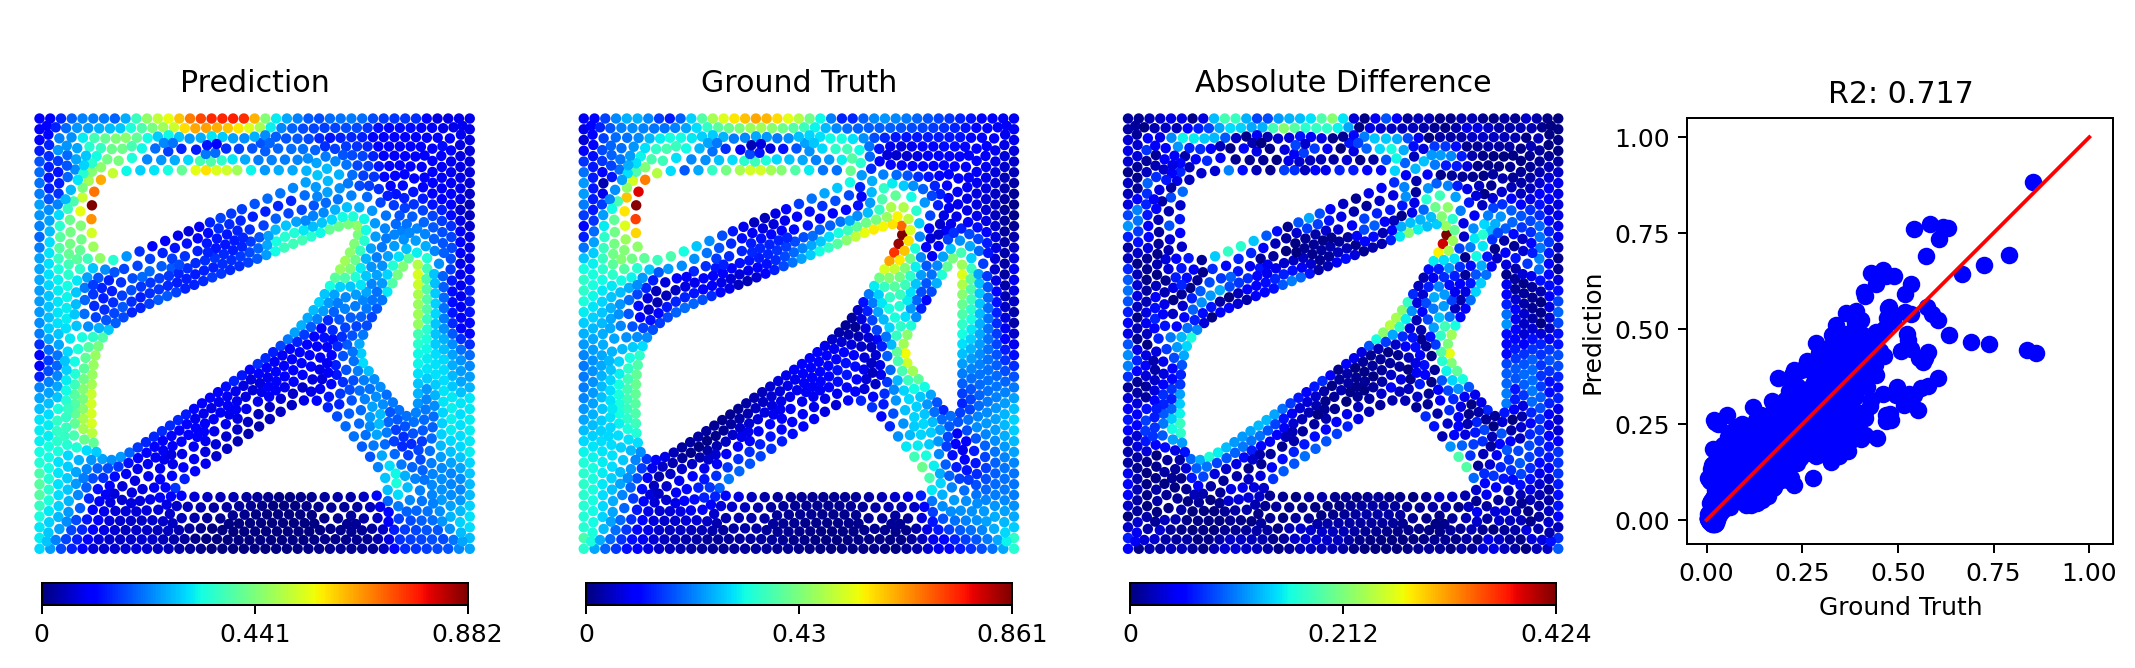

In [15]:
i = idxs_val[0]
plot_compare(model, dataset[i], s = 10, m = 1)